# 3.1: One predictor

In [1]:
from __future__ import print_function, division
%matplotlib inline

import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# use matplotlib style sheet
plt.style.use('ggplot')

# import statsmodels for R-style regression
import statsmodels.formula.api as smf

## Read the data

Data are in the *child.iq* directory of the ARM_Data download-- you might have
to change the path I use below to reflect the path on your computer.

In [2]:
#R: library("foreign")
#   kidiq <- read.dta("../../ARM_Data/child.iq/kidiq.dta")
kidiq  = pd.read_stata("../../ARM_Data/child.iq/kidiq.dta")
kidiq.head()

,kid_score,mom_hs,mom_iq,mom_work,mom_age
0,65,1,121.117529,4,27
1,98,1,89.361882,4,25
2,85,1,115.443165,4,27
3,83,1,99.449639,3,25
4,115,1,92.745710,4,27


## First regression-- binary predictor, Pg 31

Fit the regression using the non-jittered data

In [3]:
#R: 
# fit0 <- lm(kidiq$kid_score ~ kidiq$mom_hs)
# display(fit0)
fit0 = smf.ols('kid_score ~ mom_hs', data=kidiq).fit()
print(fit0.summary())

                            OLS Regression Results                            
Dep. Variable:              kid_score   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     25.69
Date:                Fri, 24 Jul 2015   Prob (F-statistic):           5.96e-07
Time:                        11:18:40   Log-Likelihood:                -1911.8
No. Observations:                 434   AIC:                             3828.
Df Residuals:                     432   BIC:                             3836.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     77.5484      2.059     37.670      0.0

## Plot Figure 3.1, Pg 32

A couple of notes for the python version:

* I have **not** included jitter, in the vertical or horizontal directions.
  Instead, the data is plotted with opacity so the regions with high
  data-density can be distinguished.
* I left the color defaults for the pandas and matplotlb output-- the
  data and line can be made black by adding *c='k'* argument to both plot
  elements.

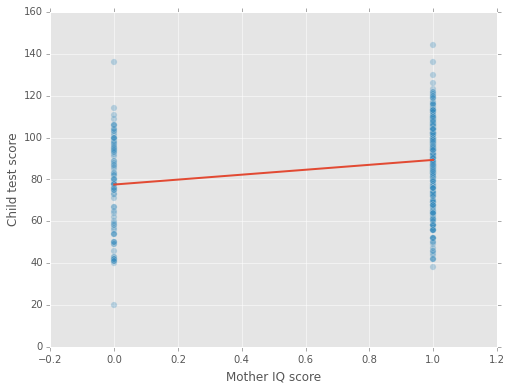

In [4]:
fig0, ax0 = plt.subplots(figsize=(8, 6))
# plot data using pandas
kidiq.plot(kind='scatter', x='mom_hs', y='kid_score',
           s=40, alpha=0.3,
           ax=ax0)
# add fit
hs_linspace = np.linspace(kidiq['mom_hs'].min(), kidiq['mom_hs'].max(), 50)
plt.plot(hs_linspace, fit0.params[0] + fit0.params[1] * hs_linspace,
         lw=2)

plt.xlabel("Mother IQ score")
plt.ylabel("Child test score")

## Second regression -- continuous predictor, Pg 32

In [5]:
#R: fit1 <- lm (kidiq$kid_score ~ kidiq$mom_iq)
#   display(fit1)
fit1 = smf.ols('kid_score ~ mom_iq', data=kidiq).fit()
print(fit1.summary())

                            OLS Regression Results                            
Dep. Variable:              kid_score   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     108.6
Date:                Fri, 24 Jul 2015   Prob (F-statistic):           7.66e-23
Time:                        11:18:41   Log-Likelihood:                -1875.6
No. Observations:                 434   AIC:                             3755.
Df Residuals:                     432   BIC:                             3763.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     25.7998      5.917      4.360      0.0

## Figure 3.2, Pg 33

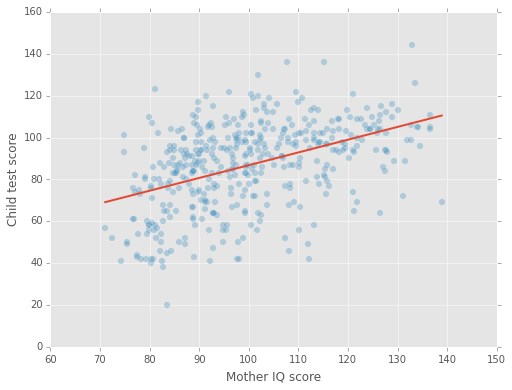

In [6]:
#R: 
# plot(kidiq$mom_iq, kidiq$kid_score,
#      xlab="Mother IQ score", 
#      ylab="Child test score",
#      pch=20, xaxt="n", yaxt="n")
# axis(1, c(80,100,120,140))
# axis(2, c(20,60,100,140))
# abline (fit1)

fig1, ax1 = plt.subplots(figsize=(8, 6))
# plot data using pandas
kidiq.plot(kind='scatter', x='mom_iq', y='kid_score',
           s=40, alpha=0.3,
           ax=ax1)
# add fit
iq_linspace = np.linspace(kidiq['mom_iq'].min(), kidiq['mom_iq'].max(), 50)
plt.plot(iq_linspace, fit1.params[0] + fit1.params[1] * iq_linspace,
         lw=2)

plt.xlabel("Mother IQ score")
plt.ylabel("Child test score")